<a href="https://colab.research.google.com/github/najlaatikahdwirahma/Health_CaseStudy-/blob/main/Model_Performance_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Data Preprocessing**

In [ ]:
# Mengubah nama kolom untuk memudahkan analisis
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flatslping'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/dl,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/dl,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/dl,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/dl,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/dl,ST-T wave abnormality,106,no,1.9,flatslping,3,fixed defect,0


In [ ]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'thalassemia']

In [ ]:
continues_cols = df.select_dtypes(include='number').columns.tolist()
continues_cols

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'target']

In [ ]:
for col in categorical_cols:
    print(df[col].unique())

['male' 'female']
['typical angina' 'atypical angina' 'non-anginal pain' 'asymptomatic']
['lower than 120mg/dl' 'greater than 120mg/dl']
['ST-T wave abnormality' 'normal' 'left ventricular hypertrophy']
['no' 'yes']
['downsloping' 'upsloping' 'flatslping']
['reversable defect' 'fixed defect' 'normal']


# **Data Preparations for Modelling**

Perlu mengubah variabel kategorikal menjadi variabel dummy dan scale numeric features sebelum melatih model Machine Learning.

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flatslping,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.dtypes

age                                          int64
resting_blood_pressure                       int64
cholesterol                                  int64
max_heart_rate_achieved                      int64
st_depression                              float64
num_major_vessels                            int64
target                                       int64
sex_male                                     uint8
chest_pain_type_atypical angina              uint8
chest_pain_type_non-anginal pain             uint8
chest_pain_type_typical angina               uint8
fasting_blood_sugar_lower than 120mg/dl      uint8
rest_ecg_left ventricular hypertrophy        uint8
rest_ecg_normal                              uint8
exercise_induced_angina_yes                  uint8
st_slope_flatslping                          uint8
st_slope_upsloping                           uint8
thalassemia_normal                           uint8
thalassemia_reversable defect                uint8
dtype: object

In [ ]:
# Memisahkan data menjadi features dan target
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train dataset shape =", X_train.shape)
print("y_train dataset shape =", y_train.shape)
print("X_test dataset shape  =", X_test.shape)
print("y_test dataset shape  =", y_test.shape)

X_train dataset shape = (820, 18)
y_train dataset shape = (820,)
X_test dataset shape  = (205, 18)
y_test dataset shape  = (205,)


# **Modelling**

## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
clf = dt_model.fit(X_train, y_train)
clf

DecisionTreeClassifier()

Memeriksa Accuracy Score

In [ ]:
dt_model.score(X_train,y_train)

1.0

In [ ]:
dt_model.score(X_test,y_test)

0.9853658536585366

In [ ]:
y_pred_dt = dt_model.predict(X)

report = classification_report(y_pred_dt, y)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       905
           1       0.17      0.76      0.28       120

    accuracy                           0.55      1025
   macro avg       0.56      0.64      0.48      1025
weighted avg       0.85      0.55      0.62      1025



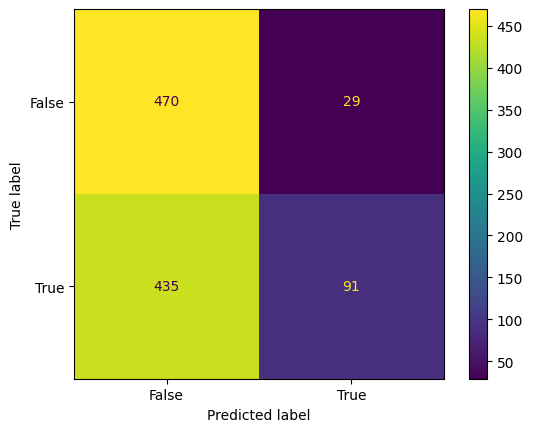

In [ ]:
actual = y
predicted = y_pred_dt

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y, y_pred_dt)
print(auc)

0.5574437849082196


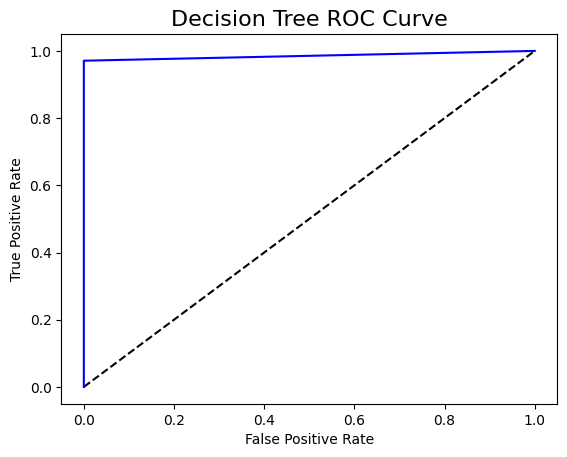

In [ ]:
#ROC
y_dtpred_prob = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_dtpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_dt, tpr_dt, label='Decision Tree',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=16)
plt.show()

## Random Forest

In [ ]:
param_RF={
    'n_estimators': [400, 1000],
    'max_depth': [15],
    'max_leaf_nodes': [50, 100, 200]
}

In [ ]:
RF_model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_RF,cv=5,scoring='accuracy')
RF_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15], 'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [400, 1000]},
             scoring='accuracy')

Memeriksa Accuracy Score

In [ ]:
RF_X_train_pred = RF_model.predict(X_train)
RF_train_accuracy = accuracy_score(RF_X_train_pred, y_train)

print("Accuracy for Training set: ", RF_train_accuracy)

Accuracy for Training set:  1.0


In [ ]:
RF_X_test_pred = RF_model.predict(X_test)
RF_test_accuracy = accuracy_score(RF_X_test_pred, y_test)

print("Accuracy for Testing set: ", RF_test_accuracy)

Accuracy for Testing set:  0.9853658536585366


In [ ]:
y_pred_RF = RF_model.predict(X)

report = classification_report(y_pred_RF, y)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.66      0.78       720
           1       0.54      0.92      0.68       305

    accuracy                           0.74      1025
   macro avg       0.75      0.79      0.73      1025
weighted avg       0.83      0.74      0.75      1025



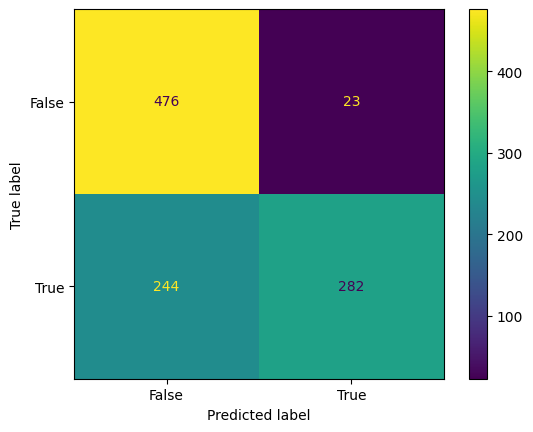

In [ ]:
actual = y
predicted = y_pred_RF

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y, y_pred_RF)
print(auc)

0.7450147443175323


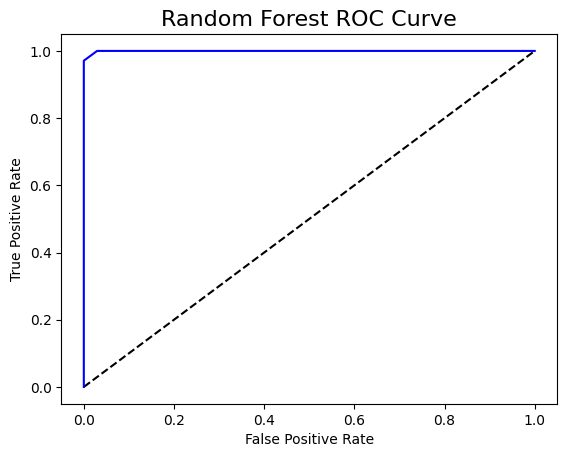

In [ ]:
#ROC
y_rfpred_prob = RF_model.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_gnb, tpr_gnb, label='Random Forest',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

# **Cross-Validation**

In [ ]:
# Mendefinisikan classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [ ]:
# Cross Validation
cross_val_scores = pd.DataFrame(columns=['Classifier', 'Cross-Validation Accuracy'])
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_score = cv_scores.mean()
    cross_val_scores = cross_val_scores.append({'Classifier': clf.__class__.__name__, 'Cross-Validation Accuracy': mean_score}, ignore_index=True)

In [ ]:
cross_val_scores

,Classifier,Cross-Validation Accuracy
0,DecisionTreeClassifier,0.978049
1,RandomForestClassifier,0.981707


# **Learning Curves**


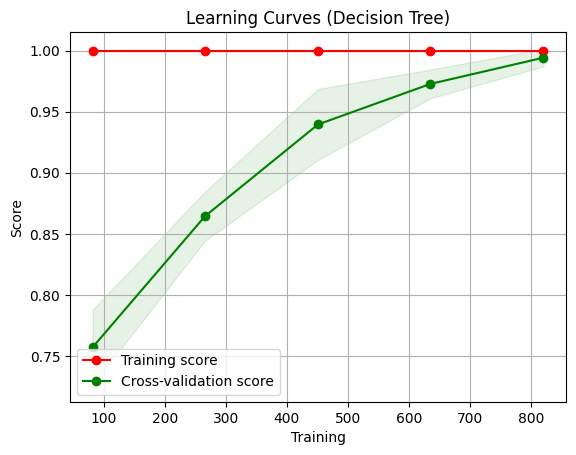

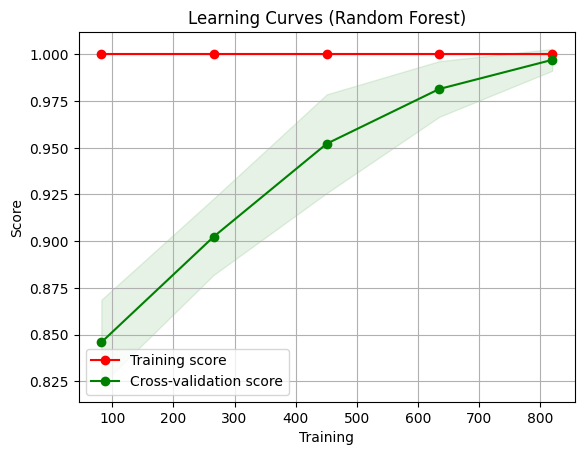

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Learning curve untuk Decision Tree
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1)

# Learning curve untuk Random Forest
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1)

plt.show()

# **Feature Selection**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

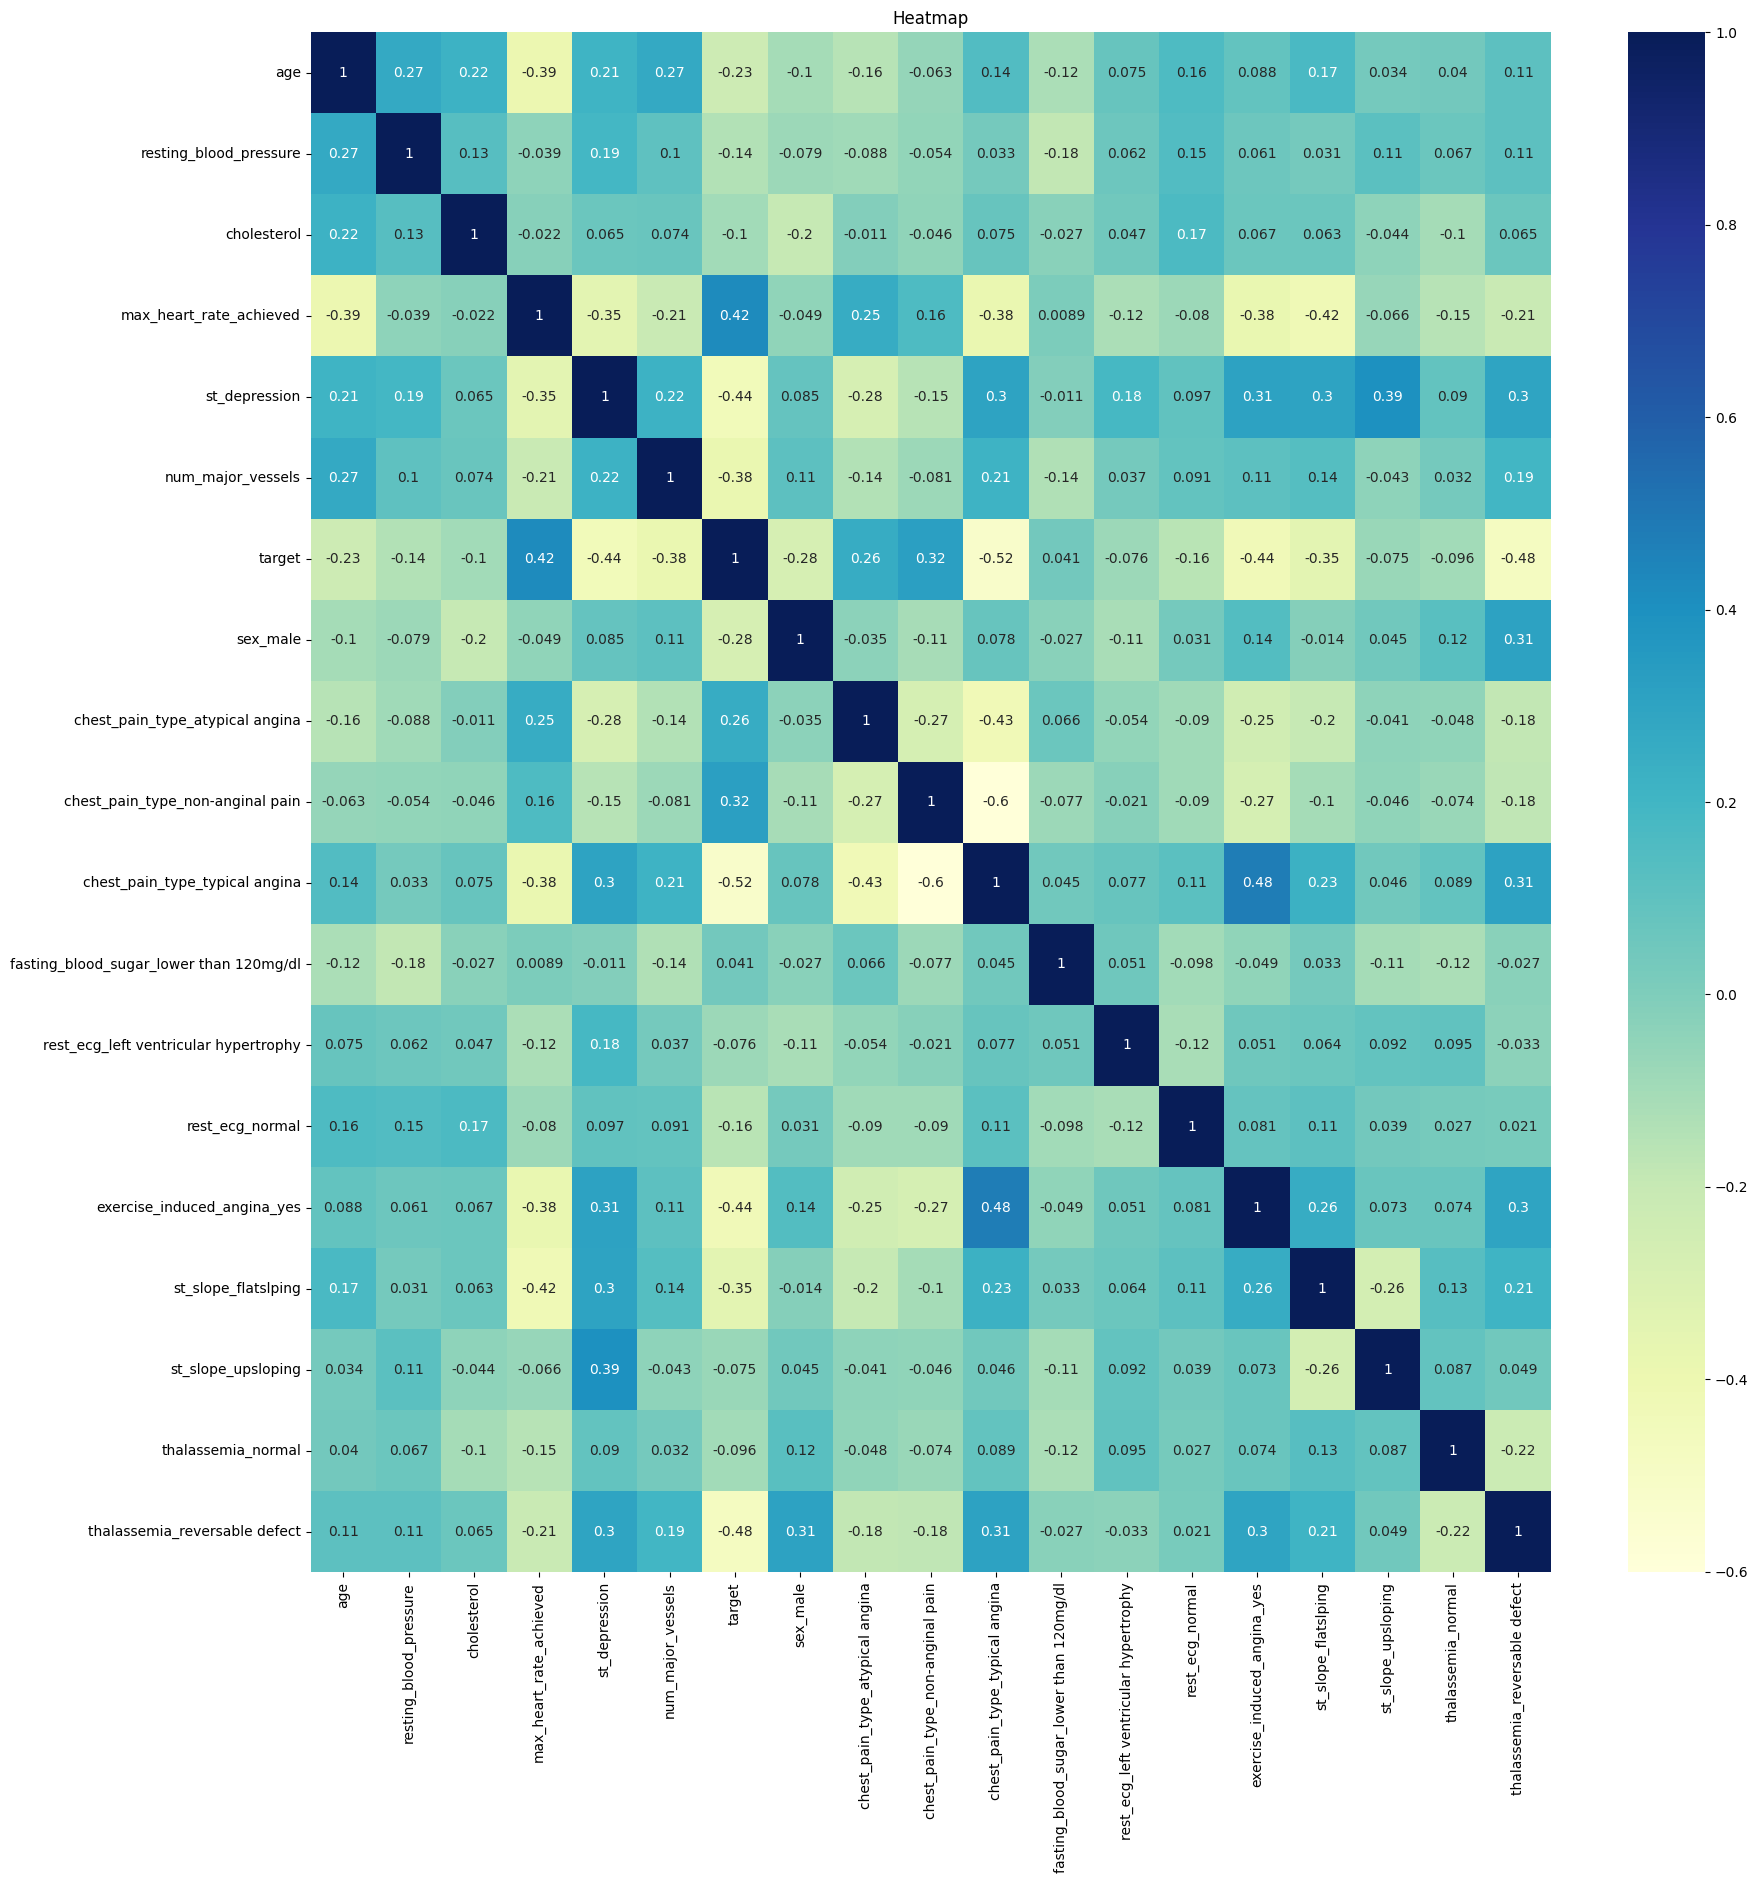

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature        VIF
0                                       age  40.274166
1                    resting_blood_pressure  58.485776
2                               cholesterol  26.783158
3                   max_heart_rate_achieved  44.458284
4                             st_depression   3.409981
5                         num_major_vessels   1.978986
6                                    target   4.326857
7                                  sex_male   4.096879
8           chest_pain_type_atypical angina   3.164983
9          chest_pain_type_non-anginal pain   4.417169
10           chest_pain_type_typical angina   7.620480
11  fasting_blood_sugar_lower than 120mg/dl   6.975211
12    rest_ecg_left ventricular hypertrophy   1.117190
13                          rest_ecg_normal   2.185407
14              exercise_induced_angina_yes   2.215172
15                      st_slope_flatslping   2.923869
16                       st_slope_upsloping   1.655156
17        

In [ ]:
df.drop(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   st_depression                            1025 non-null   float64
 1   num_major_vessels                        1025 non-null   int64  
 2   target                                   1025 non-null   int64  
 3   sex_male                                 1025 non-null   uint8  
 4   chest_pain_type_atypical angina          1025 non-null   uint8  
 5   chest_pain_type_non-anginal pain         1025 non-null   uint8  
 6   chest_pain_type_typical angina           1025 non-null   uint8  
 7   fasting_blood_sugar_lower than 120mg/dl  1025 non-null   uint8  
 8   rest_ecg_left ventricular hypertrophy    1025 non-null   uint8  
 9   rest_ecg_normal                          1025 non-null   uint8  
 10  exercise_induced_angina_yes              1025 no

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier()
clf = dt_model.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [ ]:
dt_model.score(X_train,y_train)

0.9792682926829268

In [ ]:
dt_model.score(X_test,y_test)

0.9658536585365853

In [ ]:
y_pred_dt = dt_model.predict(X)

report = classification_report(y_pred_dt, y)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       493
           1       0.98      0.97      0.98       532

    accuracy                           0.98      1025
   macro avg       0.98      0.98      0.98      1025
weighted avg       0.98      0.98      0.98      1025



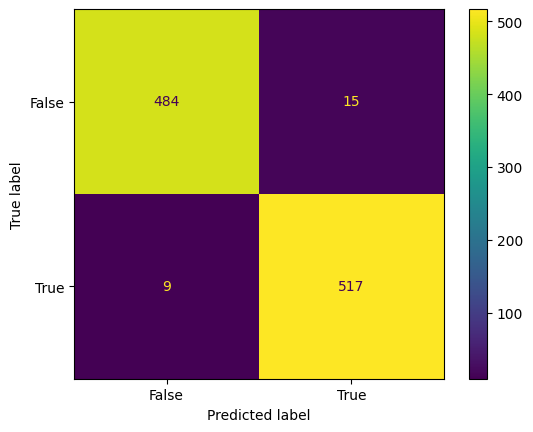

In [ ]:
actual = y
predicted = y_pred_dt

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
param_RF={
    'n_estimators': [400, 1000],
    'max_depth': [15],
    'max_leaf_nodes': [50, 100, 200]
}

In [ ]:
RF_model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_RF,cv=5,scoring='accuracy')
RF_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15], 'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [400, 1000]},
             scoring='accuracy')

In [ ]:
RF_X_train_pred = RF_model.predict(X_train)
RF_train_accuracy = accuracy_score(RF_X_train_pred, y_train)

print("Accuracy for Training set: ", RF_train_accuracy)

Accuracy for Training set:  0.9792682926829268


In [ ]:
RF_X_test_pred = RF_model.predict(X_test)
RF_test_accuracy = accuracy_score(RF_X_test_pred, y_test)

print("Accuracy for Testing set: ", RF_test_accuracy)

Accuracy for Testing set:  0.9609756097560975


In [ ]:
y_pred_RF = RF_model.predict(X)

report = classification_report(y_pred_RF, y)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       486
           1       0.99      0.96      0.98       539

    accuracy                           0.98      1025
   macro avg       0.98      0.98      0.98      1025
weighted avg       0.98      0.98      0.98      1025



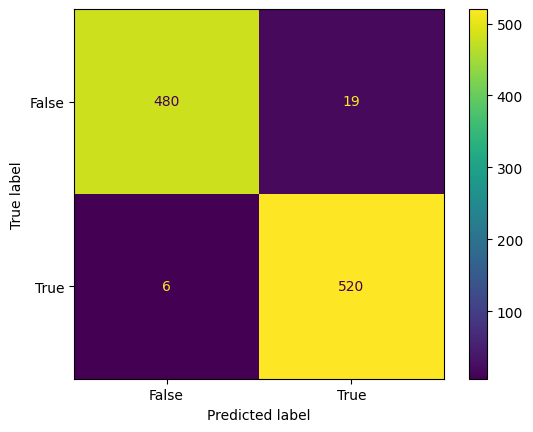

In [ ]:
actual = y
predicted = y_pred_RF

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()